# Submission 2 &ndash; Intermediate Submission

## Instructions

- Fill out the *Basic Information* and the *Results* sections.
- Make sure that this `.ipynb` file displays correctly in the GitHub file preview, including any visual output.
- If you find that any output does not display correctly, include a static screenshot as an image. For interactive outputs, add a link to a short screencast located in your repository.
- Push all required files before the deadline.

---
## Basic Information

**Team Name:** The Leading Figures

**Team Members:**
- Nikolaus Schwingshandl
- Mykhailo Stasiuk
- Muhammed Aziz Tepegöz
- Thomas Kovacsits

**Dataset Description:**  
(max. 75 words; this serves just as a reminder)

The dataset contains extensive data on different energy related metrics for countries around the world over several decades. It includes various attributes, such as the energy consumption (primary energy, per capita, and growth rates), energy mix, electricity mix and other relevant metrics.

---

## Code

Here you may place any code that is not an immediate part of your submission. Only the content of the *Results* sections will be graded for this submission.

In [1]:
# Import Stuff
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
import matplotlib.image as mpimg
import altair as alt
import pycountry_convert as pc
import numpy as np
alt.renderers.enable("mimetype")

OWID_DATA: pd.DataFrame = pd.read_csv('owid-energy-data.csv')

COUNTRIES = set(['AFGHANISTAN', 'ALBANIA', 'ALGERIA', 'AMERICAN SAMOA', 'ANDORRA', 'ANGOLA', 'ANGUILLA', 'ANTARCTICA', 'ANTIGUA AND BARBUDA', 'ARGENTINA', 'ARMENIA', 'ARUBA', 'AUSTRALIA', 'AUSTRIA', 'AZERBAIJAN', 'BAHAMAS', 'BAHRAIN', 'BANGLADESH', 'BARBADOS', 'BELARUS', 'BELGIUM', 'BELIZE', 'BENIN', 'BERMUDA', 'BHUTAN', 'BOLIVIA', 'BOSNIA AND HERZEGOVINA', 'BOTSWANA', 'BOUVET ISLAND', 'BRAZIL', 'BRITISH INDIAN OCEAN TERRITORY', 'BRUNEI DARUSSALAM', 'BULGARIA', 'BURKINA FASO', 'BURUNDI', 'CAMBODIA', 'CAMEROON', 'CANADA', 'CAPE VERDE', 'CAYMAN ISLANDS', 'CENTRAL AFRICAN REPUBLIC', 'CHAD', 'CHILE', 'CHINA', 'CHRISTMAS ISLAND', 'COCOS (KEELING) ISLANDS', 'COLOMBIA', 'COMOROS', 'CONGO', 'CONGO, THE DEMOCRATIC REPUBLIC OF', 'COOK ISLANDS', 'COSTA RICA', "COTE D'IVOIRE", 'CROATIA', 'CUBA', 'CYPRUS', 'CZECH REPUBLIC', 'CZECHIA', "CÃ”TE D'IVOIRE", 'DEMOCRATIC REPUBLIC OF CONGO', 'DENMARK', 'DJIBOUTI', 'DOMINICA', 'DOMINICAN REPUBLIC', 'ECUADOR', 'EGYPT', 'EL SALVADOR', 'EQUATORIAL GUINEA', 'ERITREA', 'ESTONIA', 'ESWATINI', 'ETHIOPIA', 'FALKLAND ISLANDS (MALVINAS)', 'FAROE ISLANDS', 'FIJI', 'FINLAND', 'FRANCE', 'FRENCH GUIANA', 'FRENCH POLYNESIA', 'FRENCH SOUTHERN TERRITORIES', 'GABON', 'GAMBIA', 'GEORGIA', 'GERMANY', 'GHANA', 'GIBRALTAR', 'GREECE', 'GREENLAND', 'GRENADA', 'GUADELOUPE', 'GUAM', 'GUATEMALA', 'GUINEA', 'GUINEA-BISSAU', 'GUYANA', 'HAITI', 'HEARD ISLAND AND MCDONALD ISLANDS', 'HONDURAS', 'HONG KONG', 'HUNGARY', 'ICELAND', 'INDIA', 'INDONESIA', 'IRAN', 'IRAQ', 'IRELAND', 'ISRAEL', 'ITALY', 'JAMAICA', 'JAPAN', 'JORDAN', 'KAZAKHSTAN', 'KENYA', 'KIRIBATI', "KOREA, DEMOCRATIC PEOPLE'S REPUBLIC OF", 'KOREA, REPUBLIC OF', 'KUWAIT', 'KYRGYZSTAN', "LAO PEOPLE'S DEMOCRATIC REPUBLIC", 'LAOS', 'LATVIA', 'LEBANON', 'LESOTHO', 'LIBERIA', 'LIBYA', 'LIBYAN ARAB JAMAHIRIYA', 'LIECHTENSTEIN', 'LITHUANIA', 'LUXEMBOURG', 'MACAO', 'MACEDONIA, THE FORMER YUGOSLAV REPUBLIC OF', 'MADAGASCAR', 'MALAWI', 'MALAYSIA', 'MALDIVES', 'MALI', 'MALTA', 'MARSHALL ISLANDS', 'MARTINIQUE', 'MAURITANIA', 'MAURITIUS', 'MAYOTTE', 'MEXICO', 'MICRONESIA, FEDERATED STATES OF', 'MOLDOVA', 'MOLDOVA, REPUBLIC OF', 'MONACO', 'MONGOLIA', 'MONTENEGRO', 'MONTSERRAT', 'MOROCCO', 'MOZAMBIQUE', 'MYANMAR', 'NAMIBIA', 'NAURU', 'NEPAL', 'NETHERLANDS', 'NETHERLANDS ANTILLES', 'NEW CALEDONIA', 'NEW ZEALAND', 'NICARAGUA', 'NIGER', 'NIGERIA', 'NIUE', 'NORFOLK ISLAND', 'NORTH KOREA', 'NORTH MACEDONIA', 'NORTHERN MARIANA ISLANDS', 'NORWAY', 'OMAN', 'PAKISTAN', 'PALAU', 'PALESTINE', 'PALESTINIAN TERRITORY, OCCUPIED', 'PANAMA', 'PAPUA NEW GUINEA', 'PARAGUAY', 'PERU', 'PHILIPPINES', 'PITCAIRN', 'POLAND', 'PORTUGAL', 'PUERTO RICO', 'QATAR', 'ROMANIA', 'RUSSIA', 'RUSSIAN FEDERATION', 'RWANDA', 'RÃ‰UNION', 'SAINT HELENA', 'SAINT KITTS AND NEVIS', 'SAINT LUCIA', 'SAINT PIERRE AND MIQUELON', 'SAINT VINCENT AND THE GRENADINES', 'SAMOA', 'SAN MARINO', 'SAO TOME AND PRINCIPE', 'SAUDI ARABIA', 'SENEGAL', 'SERBIA', 'SERBIA AND MONTENEGRO', 'SEYCHELLES', 'SIERRA LEONE', 'SINGAPORE', 'SLOVAKIA', 'SLOVENIA', 'SOLOMON ISLANDS', 'SOMALIA', 'SOUTH AFRICA', 'SOUTH GEORGIA AND SOUTH SANDWICH ISLANDS', 'SOUTH KOREA', 'SPAIN', 'SRI LANKA', 'SUDAN', 'SURINAME', 'SVALBARD AND JAN MAYEN', 'SWAZILAND', 'SWEDEN', 'SWITZERLAND', 'SYRIA', 'SYRIAN ARAB REPUBLIC', 'TAIWAN', 'TAIWAN, PROVINCE OF CHINA', 'TAJIKISTAN', 'TANZANIA', 'TANZANIA, UNITED REPUBLIC OF', 'THAILAND', 'TIMOR', 'TOGO', 'TOKELAU', 'TONGA', 'TRINIDAD AND TOBAGO', 'TUNISIA', 'TURKEY', 'TURKMENISTAN', 'TURKS AND CAICOS ISLANDS', 'TUVALU', 'UGANDA', 'UKRAINE', 'UNITED ARAB EMIRATES', 'UNITED KINGDOM', 'UNITED STATES', 'UNITED STATES MINOR OUTLYING ISLANDS', 'URUGUAY', 'UZBEKISTAN', 'VANUATU', 'VENEZUELA', 'VIET NAM', 'VIETNAM', 'VIRGIN ISLANDS, BRITISH', 'VIRGIN ISLANDS, U.S.', 'WALLIS AND FUTUNA', 'WESTERN SAHARA', 'YEMEN', 'ZAMBIA', 'ZIMBABWE'])

CONTINENT_MAP = {
    'AF': 'Africa',
    'AS': 'Asia',
    'EU': 'Europe',
    'NA': 'North America',
    'SA': 'South America',
    'OC': 'Oceania and Australia'
}

CONTINENTS = ['AF', 'AS', 'EU', 'NA', 'SA', 'OC']

def check_country(c: pd.DataFrame) -> bool:
    return c['country'].upper() in COUNTRIES

def map_country_continent(country_name: str) -> str:

    if country_name.title() == 'Sao Tome And Principe':
        alpha2 = 'ST'
    elif country_name.title() == 'Trinidad And Tobago':
        alpha2 = 'TT'
    elif country_name.title() == 'Bosnia And Herzegovina':
        alpha2 = 'BA'
    elif country_name.title() == "Cote D'Ivoire":
        alpha2 = 'CI'
    elif country_name.title() == 'Democratic Republic Of Congo':
        return 'AF'
    else:
        alpha2 = pc.country_name_to_country_alpha2(country_name.title(), cn_name_format="default")
    return pc.country_alpha2_to_continent_code(country_2_code=alpha2)

def prepare_data(data: pd.DataFrame, year: int):
    prepared_data = data[['population', 'country', 'year', 'gdp', 'energy_per_capita']]
    country_mask = prepared_data.apply(func=check_country, axis=1)
    
    prepared_data: pd.DataFrame = prepared_data[country_mask]
    year_mask = prepared_data['year'] == year
    prepared_data = prepared_data[year_mask]
    prepared_data = prepared_data.dropna()
    
    # Calculate gdp/capita
    prepared_data['gdp_per_capita'] = prepared_data['gdp'] / prepared_data['population']

    # Add Continent information
    prepared_data['continent_code'] = prepared_data['country'].map(map_country_continent)
    prepared_data['continent'] = prepared_data['country'].map(map_country_continent).map(lambda c: CONTINENT_MAP[c])
    
    return prepared_data

def regression(data: pd.DataFrame) -> dict:
    np_data: np.ndarray = np.array(data[['gdp_per_capita', 'energy_per_capita']])
    avg_gdp: float = np.mean(np_data[:, 0])
    avg_energy: float = np.mean(np_data[:, 1])
    
    stdev_gdp: float = np.std(np_data[:, 0])
    stdev_energy: float = np.std(np_data[:, 1])

    cov_gdp_energy: float = np.dot( np_data[:,0] - avg_gdp, np_data[:, 1] - avg_energy ) / (data.shape[0])
    pearson: float = cov_gdp_energy / (stdev_gdp * stdev_energy)
    r_squared: float = pearson ** 2
    k: float = pearson * (stdev_energy / stdev_gdp)
    d: float = avg_energy - k * avg_gdp

    return {
        'avg_gdp': avg_gdp,
        'avg_energy': avg_energy,
        'stdev_gdp': stdev_gdp,
        'stdev_energy': stdev_energy,
        'cov_gdp_energy': cov_gdp_energy,
        'pearson': pearson,
        'r_squared': r_squared,
        'k': k,
        'd': d,
    }

def plot_gdppc_vs_energypc(data: pd.DataFrame, year: int):
    data = prepare_data(data, year)
    
    reg_info: dict = regression(data)
    reg_linear_func = lambda gdp: reg_info['k'] * gdp + reg_info['d']
    
    reg_data: pd.DataFrame = pd.DataFrame({
         'gdp_per_capita': np.linspace(data['gdp_per_capita'].min(), data['gdp_per_capita'].max(), num=100),
         'label': [f"f(x) = {reg_info['k']:.2f} * x + {reg_info['d']:.2f}"] * 100  # Label includes regression equation
    })

    reg_data['predicted_energy_per_capita'] = reg_linear_func(reg_data['gdp_per_capita'])
    
    # https://vega.github.io/vega/docs/schemes/#reference
    base_binned = (
        alt.Chart(data=data)
            .mark_rect(opacity=0.5)
            .encode(
                x=alt.X('gdp_per_capita:Q', title='GDP per capita (USD)').bin(step=5_000),
                y=alt.Y('energy_per_capita:Q', title='Energy Consumption per capita (kWh)').bin(step=10_000),
                color=alt.Color('distinct(country):Q', title='Number of Countries')
            )
    )

    
    reg_line = (
        alt.Chart(reg_data)
        .mark_line()
        .encode(
            x='gdp_per_capita:Q',
            y='predicted_energy_per_capita:Q',
            color=alt.Color('label:N', title="Regression Line", scale=alt.Scale(domain=[f"f(x) = {reg_info['k']:.2f} * x + {reg_info['d']:.2f}"], range=['red'])),
        )
    )

    base = (
        alt.Chart(data=data)
            .mark_point(opacity=0)
            .encode(
                x=alt.X('gdp_per_capita:Q', title='GDP per capita (USD)'),
                y=alt.Y('energy_per_capita:Q', title='Energy Consumption per capita (kWh)'),
            )
    )
    return alt.layer(base, base_binned, reg_line).configure_axis(grid=True).properties(
        width=1000,
        height=550,
        title=f'Energy Consumption per capita vs GDP per capita including Regression in {year}'
    )

def plot_correlation(data: pd.DataFrame, _from: int, _to: int ):
    correlation_list: list[dict] = []
    
    for year in range(_from, _to + 1):
        prepared_data = prepare_data(data, year)
        ret_reg_info: dict = regression(prepared_data)
        ret_reg_info['continent'] = 'Worldwide'
        ret_reg_info['year'] = year
        correlation_list.append(ret_reg_info)

        # CONTINENTS = ['AF', 'AS', 'EU', 'NA', 'SA', 'OC']
        for continent in CONTINENTS:
            continent_data = prepared_data[prepared_data['continent_code'] == continent]
            reg_info: dict = regression(continent_data)
            
            reg_info['continent'] = CONTINENT_MAP[continent]
            reg_info['year'] = year
            correlation_list.append(reg_info)
    
    correlation_data: pd.DataFrame = pd.DataFrame(correlation_list)
    pearson = (
        alt.Chart(correlation_data)
            .mark_line(opacity=1)
            .encode(
                x = alt.X('year:N', title='Year'),
                y = alt.Y('pearson', title='Pearson Correlation Coefficient'),
                color=alt.Color(
                    'continent:N',
                    title='Continent',
                ),
                strokeDash=alt.StrokeDash(
                    'continent:N',
                    scale=alt.Scale(
                        domain=['Oceania and Australia', 'Africa', 'Asia', 'Europe', 'North America', 'South America', 'Worldwide'],
                        range=[[5, 5], [0], [0], [0], [0], [0], [0]]
                    ),
                    title='Line Style'
                )
            )
    )

    return pearson.properties(
        width=1000,
        height=550,
        title='Pearson Correlation between GDP/Capita and Energy Consumption/Capita by Continent and Year'
    )

def plot_a1():
    plot_gdppc_vs_energypc(OWID_DATA, 2020).display()
    plot_correlation(OWID_DATA, _from = 1980, _to = 2020).display()

def plot_a2():

    
    """ 
    Plot 1 Boxplots showing renewable electricity production of the 5 largest electricity producers from 2000 - 2020.
    """
    
    # load data
    data_csv_name='cleaned_countries_only.csv'
    df = pd.read_csv(data_csv_name)
    
    # group by 'Entity' and find the maximum electricity production
    max_generation = df.loc[df.groupby('Entity')['Electricity generation - TWh'].idxmax()]
    
    # get the top 10
    top_10_countries = max_generation.sort_values(by='Electricity generation - TWh', ascending=False).head(10)
    
    # get top 5 countries
    top_5_countries = top_10_countries['Entity'].head(5).tolist()
    
    # collect colors for the horizontal bar chart to match later scatter plot.
    colors = {}
    plt.figure(figsize=(10, 6))
    for country in top_5_countries:
        # Assign a line to each country
        line, = plt.plot([], [], label=country)
        colors[country] = line.get_color()  # get colors
    plt.close()  # Close the dummy plot
    
    # get data from top 5
    top_5_data = max_generation[max_generation['Entity'].isin(top_5_countries)]
    
    # sort the data
    top_5_data = top_5_data.sort_values(by='Electricity generation - TWh', ascending=False)
    
    # plot horizontal bar chart for top 5 countries
    plt.figure(figsize=(13, 7.5))
    bars = plt.barh(
        top_5_data['Entity'],
        top_5_data['Electricity generation - TWh'],
        color=[colors[country] for country in top_5_data['Entity']] # Use colors from dummy plot so the match scatter plot colors.
    
    )
    
    # add values inside the bars
    for bar in bars:
        width = bar.get_width()
        plt.text(
            width - (width * 0.05),  # put it inside the bar
            bar.get_y() + bar.get_height() / 2,
            f'{width:.0f}',  # no decimals
            va='center',
            ha='right',  # align text to the right, inside the bar
            fontsize=26,  # smaller text size for values
            color='white',  # white text for contrast
            weight='bold'
        )
    
    # add country names on the right
    for i in range(len(bars)):
        bar = bars[i]
        country = top_5_data['Entity'].iloc[i] 
        plt.text(
            bar.get_width() + 300,  # offset to the right of the bar
            bar.get_y() + bar.get_height() / 2,  # center text vertically
            country,
            va='center',
            ha='left',
            fontsize=35,  # larger text size for country names
            weight='bold',
            color='black'
        )
    
    # set a  fitting title 
    plt.title("Top 5 Electricity Producers (2000-2020) [TWh/year]",loc='left', fontsize=35, weight='bold', pad=20)
    
    # remove axes and grid so it can function as a label.
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
    plt.gca().grid(False)
    
    # highest value on top
    plt.gca().invert_yaxis()
    
    
    # save as file to load as inset.
    output_file = 'electricity_generation_chart.png'  # Set file name
    plt.savefig(output_file, bbox_inches='tight', dpi=600)  # Save for later use
    plt.close()  # close the dummy plot
    
    renewables_df = pd.read_csv('share-electricity-renewables.csv')
    filtered_renewables = renewables_df[renewables_df['Entity'].isin(top_5_countries)] # get renewable electricity production for the top 5 countries.
    
    # only values between 2000-2023
    filtered_renewables = filtered_renewables[
        (filtered_renewables['Year'] >= 2000) & (filtered_renewables['Year'] <= 2020)
    ]
    
    # load the saved image 
    img = mpimg.imread('electricity_generation_chart.png')
    
    # set size
    plt.figure(figsize=(14, 7.5))
    
    # add labels
    plt.title('Renewable Electricity Rate (2000-2020)', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Renewables (% of Electricity)', fontsize=14)
    
    # only show x-values 2000,2005,2010,2015,2020
    plt.xticks([2000,2005, 2010, 2015, 2020], fontsize=12)
    
    # plot with connected dots
    for country in top_5_countries:
        country_data = filtered_renewables[filtered_renewables['Entity'] == country]
        plt.scatter(country_data['Year'], country_data['Renewables - % electricity'], label=country, s=50)
        plt.plot(country_data['Year'], country_data['Renewables - % electricity'], linestyle='-', alpha=0.7)
    
    
    # here I define the dimensions used for importing the previous figure. Needs some playing around to work.
    width = 0.22
    height = 0.17
    pos_x = 0.13
    pos_y = 0.42
    inset_ax = plt.gcf().add_axes([pos_x, pos_y, pos_x + width, pos_y + height])  # [left, bottom, width, height] in figure coordinates
    inset_ax.imshow(img, alpha = 1)
    inset_ax.axis('off')  # Turn off the axe
    
    # show plot
    plt.grid(False)
    plt.show()
    
    """ 
    Plot 2 Boxplots showing distribution of renewable electricity production per continent from 2000 - 2020.
    """
    
    # this csv.file has values for 2000,2010 and 2020 of renewable energy production per country as well as it's continent.
    file_path = "filtered_electricity_renewables_all_years.csv" 
    data = pd.read_csv(file_path)
    
    # renaming some columns
    data = data.rename(
        columns={
            "Year": "years",
            "Renewables - % electricity": "renewable_percentage",
            "Continent": "continent"
        }
    )
    # match figure size with top plot.
    plt.figure(figsize=(14, 7.5))
    
    # add labels
    plt.title("Renewable Electricity Percentage by Continent and Year", fontsize=14)
    plt.xlabel("Years", fontsize=12)
    plt.ylabel("% Electricity from Renewables", fontsize=12)
    
    # switch to dark mode ;)
    plt.gca().set_facecolor("darkgray") 
    
    # this defines the larger background boxplot 
    combined_box = sns.boxplot(
        data=data,
        x="years",
        y="renewable_percentage",
        color="lightgray",  
        width=0.7,          
        dodge=False,        
        whiskerprops={'linewidth': 0},  # Remove whiskers
        capprops={'linewidth': 0},
        boxprops={'linewidth': 0} ,
        medianprops={'linewidth': 1.5, 'color': 'black'} # Using black and bigger width for visual clarity
    )
    
    # plot the boxplots split by continents (base layer)
    continent_boxplot = sns.boxplot(
        data=data,
        x="years",
        y="renewable_percentage",
        hue="continent",
        showfliers=False,  # Remove outliers
        dodge=True,        # Split the continents
        width=0.6,          # Wider boxes for the split data  # Removes the whiskers
        whiskerprops={'linewidth': 0},  # Removes the whiskers
        capprops={'linewidth': 0},
        boxprops={'linewidth': 0.5}, 
        medianprops={'linewidth': 1, 'color': 'white'} # Using black and less width for visual clarity and separation from "big" median.
    )
    
    # adjust transparency
    for patch in combined_box.patches:
        # this is to identify the background boxplot by color and leave it's alpha at 1.
        if patch.get_facecolor() == (0.8274509803921568, 0.8274509803921568, 0.8274509803921568, 1.0):  
            pass
        else:
            # these are the smaller boxplots, setting alpha to 0.8 looks nicer.
            patch.set_alpha(0.8)  
    
    # add a custom legend entry for the combined boxplot
    handles, labels = continent_boxplot.get_legend_handles_labels()
    
    # add a legend
    plt.legend(
        handles=handles,
        title="Continent",
        bbox_to_anchor=(0.5, 0.95),  # center the legend above the plot
        loc='center',  # set a center
        ncol=len(handles) + 1,  # show labels in a row
    )
    
    # show the plot
    plt.grid(False)
    plt.show()

---
## Results &ndash; Simple Hypotheses/Tasks

### A.1

Restate your hypothesis/task below.

**Hypthesis/Task A.1:** There is a positive correlation between time and the sustainable energy ratio over a specified year range (e.g., 1980 to 2000).

Place your visualizations below (max. 2). Make sure that everyting displays correctly in the GitHub file preview.

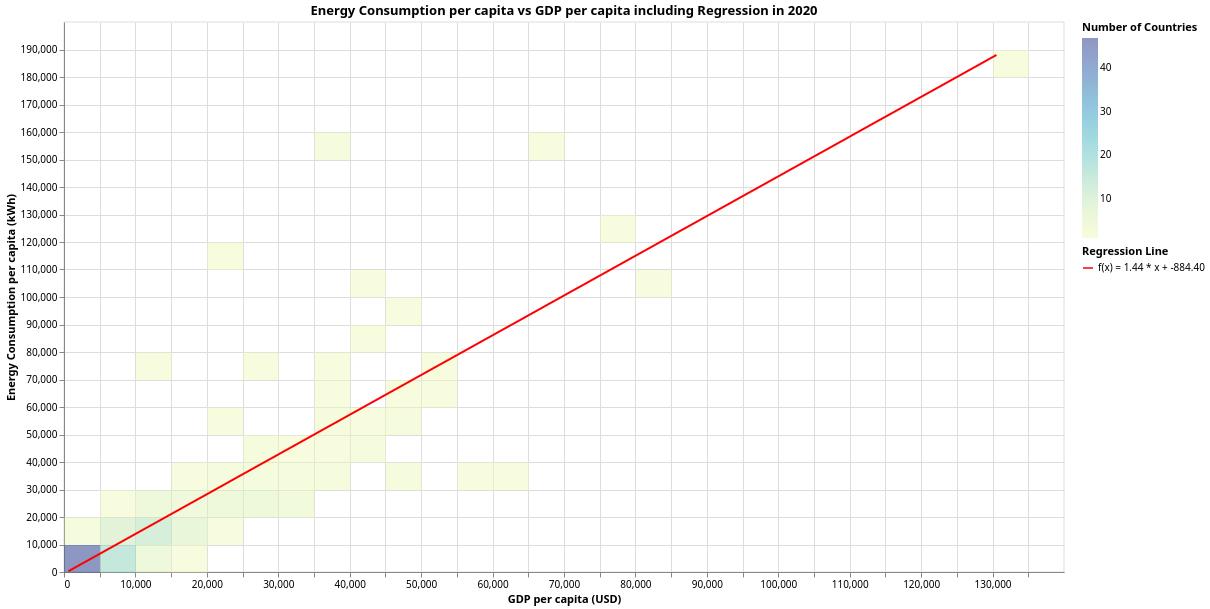

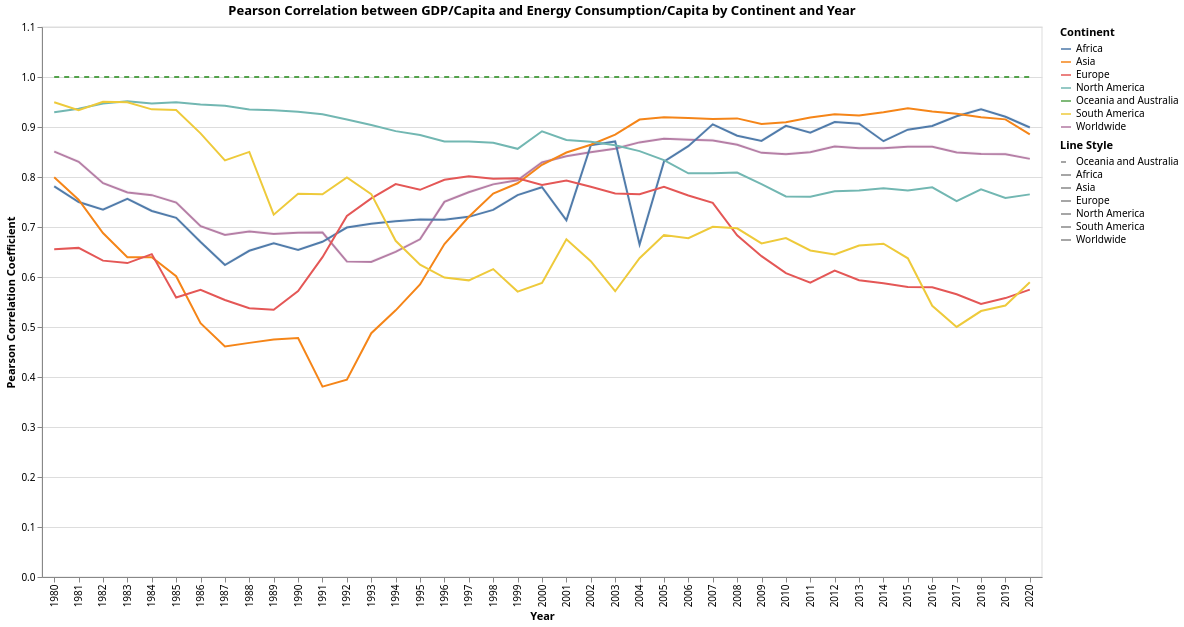

In [2]:
plot_a1()

Describe your visualizations and findings. Be clear which chart(s) you are referring to and relate your findings to the hypothesis/task.
Use no more than 150 words and indicate the word count of your description below.

**Description:** In the first visualization, we plot the energy consumption per capita against the GDP per capita for different countries for the year 2020 including a linear regression line. We have chosen to use bins due to many samples which would otherwise clutter the visualization. \
We can observe that the linear regression line, which describes the linear correlation between the two features, is indeed positive at least for this year.

In the second visualization, which shows the linear correlation between the two features for the years of 1980 through 2020, it is clear that the correlation is in fact positive, as was hypothesized. Furthermore, recall that a pearson correlation coefficient close to 1 indicates a rather strong linear correlation. Even though there are continental differences, the wordwide correlation is rather strongly positive. (Note that for Oceania and Australia this coefficient is one, since only 2 countries are present)

**Word count**: 147

### A.2

Restate your hypothesis/task below.

**Hypthesis A.2:** There is a positive correlation between time and the sustainable energy ratio over a specified year range (e.g., 1980 to 2000).

Place your visualizations below (max. 2). Make sure that everyting displays correctly in the GitHub file preview.

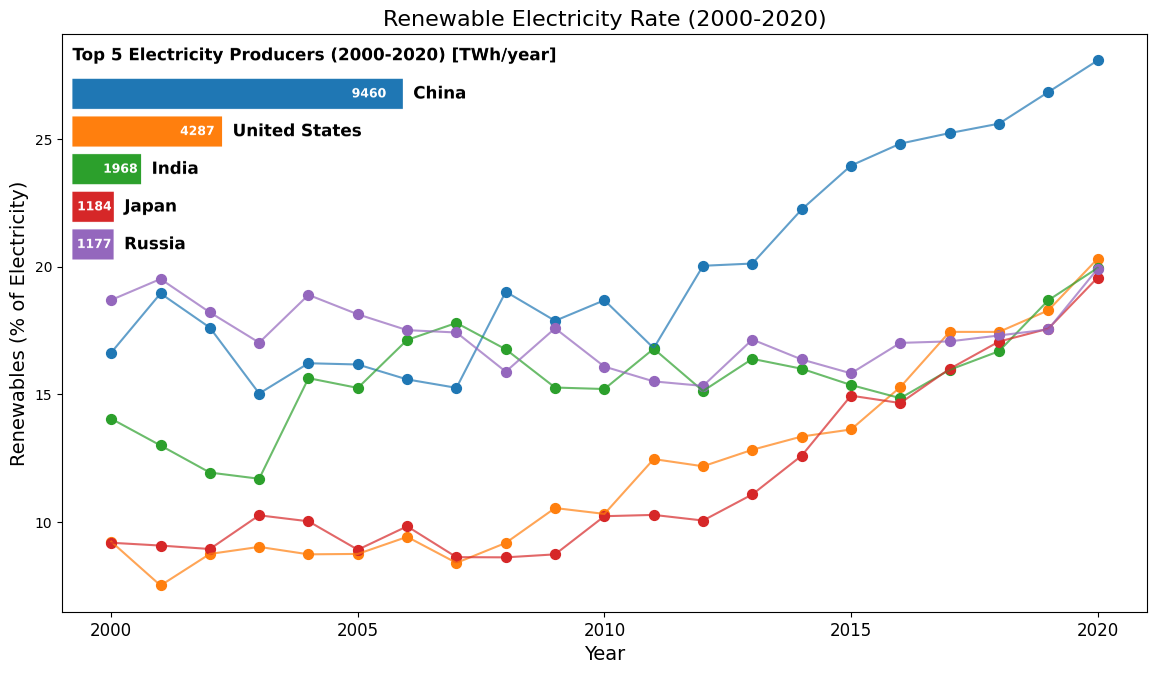

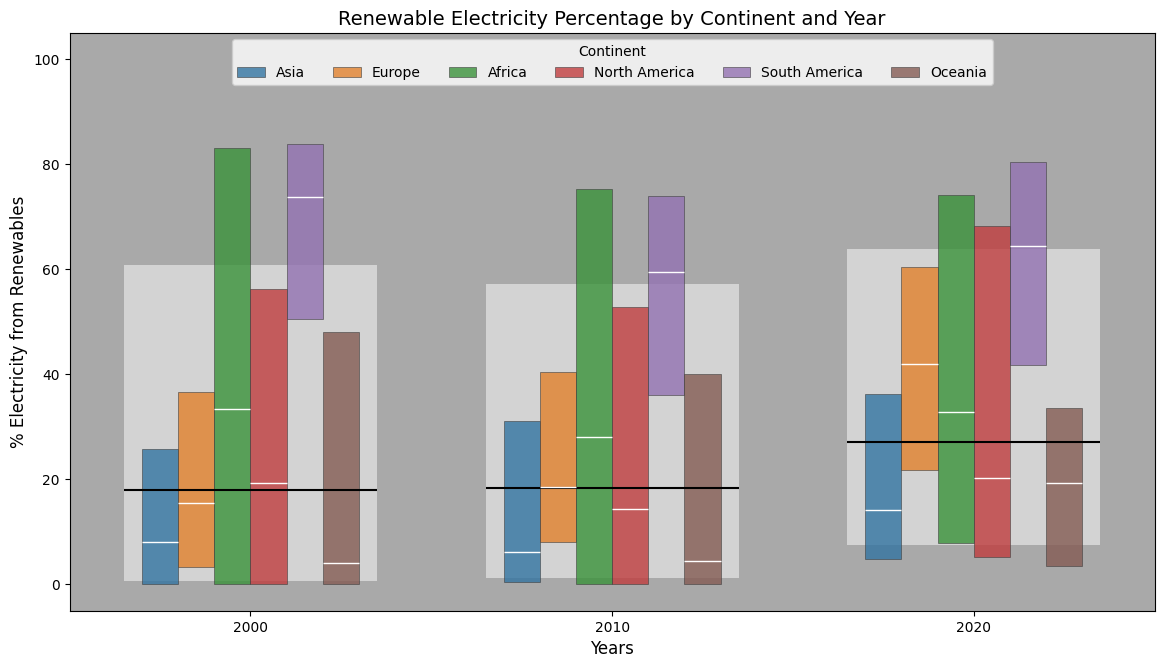

In [3]:
plot_a2()

Describe your visualizations and findings. Be clear which chart(s) you are referring to and relate your findings to the hypothesis/task. Use no more than 150 words and indicate the word count of your description below.

**Description:** To examine our hypothesis, we present two visualizations showing changes in the ratio of electricity from renewable sources, an indicator of the shift to sustainable energy, from 2000 to 2020.
The graph on top highlights the five largest energy-producing countries. It uses the maximum energy production (TWh/year) during the timeframe in a horizontal bar chart, which also serves as labels for a scatter plot showing the percentage of renewable electricity over time. This strongly supports our hypothesis by showing the increase in renewable electricity production for the five most important energy producers.
The graph below groups data by continent using boxplots to show quartiles and medians for each. A larger background boxplot shows the combined distribution. This also clearly demonstrates an increase during the timeframe.

**Word count**: 125